# Task
Explore Temperature Data:

Visualize the distribution of UHI index values and identify outliers or anomalies.
Map the spatial distribution of the 11,229 points to understand geographic coverage.
Context: Temperature data (Training_data_uhi_index.csv): Data was collected by CAPA Strategies using a ground traverse (Figures 1 and 2) with vehicles and bicycles on a single day in the summer of 2021. This data collection effort resulted in 11,229 data points which will be the focus for this data challenge. - Figure 1. Ground-level temperature data was collected by CAPA Strategies and community volunteers using temperature recording devices mounted to cars and bikes. This data collection campaign was part of the international “Heat Watch” program. Credit: CAPA Strategies, LLC. Figure 2. Data was collected across Manhattan and the Bronx in New York City on July 24, 2021, between 3:00 pm and 4:00 pm. The data (11,229 points) was converted to a UHI Index for the purpose of this data challenge. The image above shows areas of lower UHI index values (cool spots) in yellow and areas of higher UHI index values (hot spots) in dark red. For this challenge, we have created a unique UHI index for every data point location. This index reflects the local temperature at the data point location compared to the city's average temperature across all data points during the time window of the data collection. Though this is not a perfect approach to modelling the complex urban heating dynamics of a city, it will provide a reasonably accurate model of urban heat islands in the city at the time of day consistent with the data collection. In an ideal situation, time series data would be collected at thousands of locations across the city and weather data (e.g., wind speed, wind direction, solar flux) would be added to the model to yield more accuracy and allow for consideration of natural variability. UHI Index = (Temperature at a given location) / (Mean temperature for all locations) Note: UHI

Here is all the data you need:
"Training_data_uhi_index.csv"

## Data loading

### Subtask:
Load the dataset.


**Reasoning**:
I need to import the pandas library and load the provided CSV file into a pandas DataFrame.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('Training_data_uhi_index.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Training_data_uhi_index.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Unable to parse the CSV file. Please check its format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Longitude,Latitude,datetime,UHI Index
0,-73.909167,40.813107,24-07-2021 15:53,1.030289
1,-73.909187,40.813045,24-07-2021 15:53,1.030289
2,-73.909215,40.812978,24-07-2021 15:53,1.023798
3,-73.909242,40.812908,24-07-2021 15:53,1.023798
4,-73.909257,40.812845,24-07-2021 15:53,1.021634


## Data exploration

### Subtask:
Explore the loaded temperature data to understand its characteristics.


**Reasoning**:
Examine the shape, data types, descriptive statistics, distribution, and missing values of the DataFrame `df`, as instructed in the subtask.



Shape of the DataFrame: (11229, 4)

Data types of each column:
 Longitude    float64
Latitude     float64
datetime      object
UHI Index    float64
dtype: object

Descriptive statistics for 'UHI Index':
 count    11229.000000
mean         1.000001
std          0.016238
min          0.956122
25%          0.988577
50%          1.000237
75%          1.011176
max          1.046036
Name: UHI Index, dtype: float64


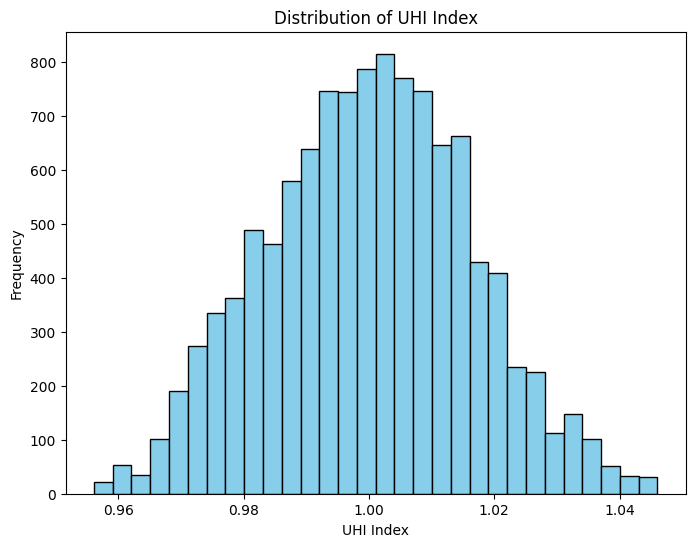


Missing values per column:
 Longitude    0
Latitude     0
datetime     0
UHI Index    0
dtype: int64


In [2]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Check data types
print("\nData types of each column:\n", df.dtypes)

# Calculate descriptive statistics for 'UHI Index'
print("\nDescriptive statistics for 'UHI Index':\n", df['UHI Index'].describe())

# Investigate the distribution of 'UHI Index'
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(df['UHI Index'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('UHI Index')
plt.ylabel('Frequency')
plt.title('Distribution of UHI Index')
plt.show()


# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

## Data visualization

### Subtask:
Visualize the distribution of the UHI index and identify potential outliers.


**Reasoning**:
Create a histogram and a box plot of the 'UHI Index' to visualize its distribution and identify potential outliers.



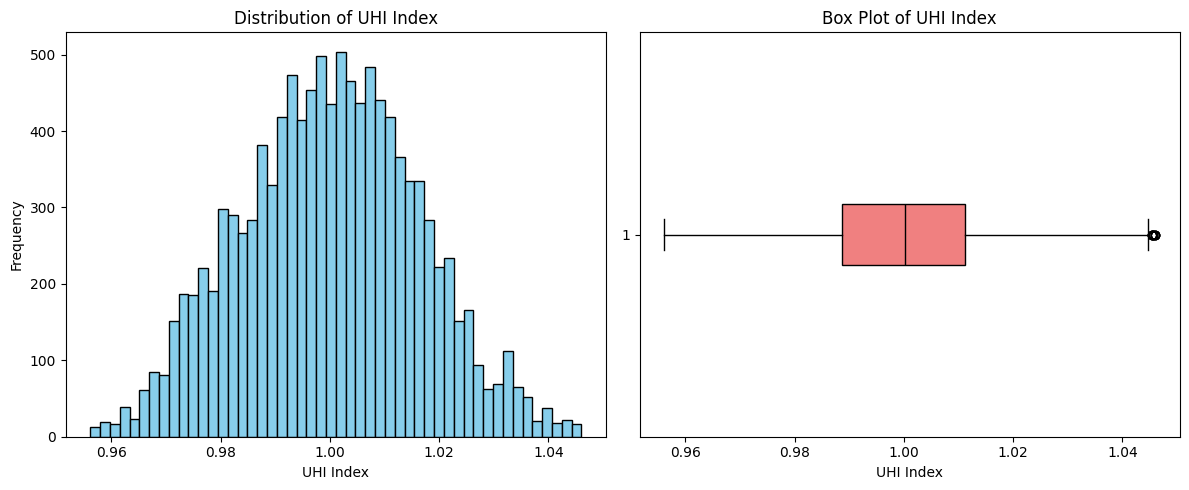

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(df['UHI Index'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('UHI Index')
plt.ylabel('Frequency')
plt.title('Distribution of UHI Index')

# Box plot
plt.subplot(1, 2, 2)
plt.boxplot(df['UHI Index'], vert=False, patch_artist=True, showfliers=True,
            medianprops={'color': 'black'}, boxprops={'facecolor': 'lightcoral'})
plt.xlabel('UHI Index')
plt.title('Box Plot of UHI Index')

plt.tight_layout()
plt.show()

## Data visualization

### Subtask:
Visualize the spatial distribution of the UHI index values on a scatter plot.


**Reasoning**:
Create a scatter plot of Longitude vs. Latitude, colored by UHI Index, to visualize the spatial distribution.



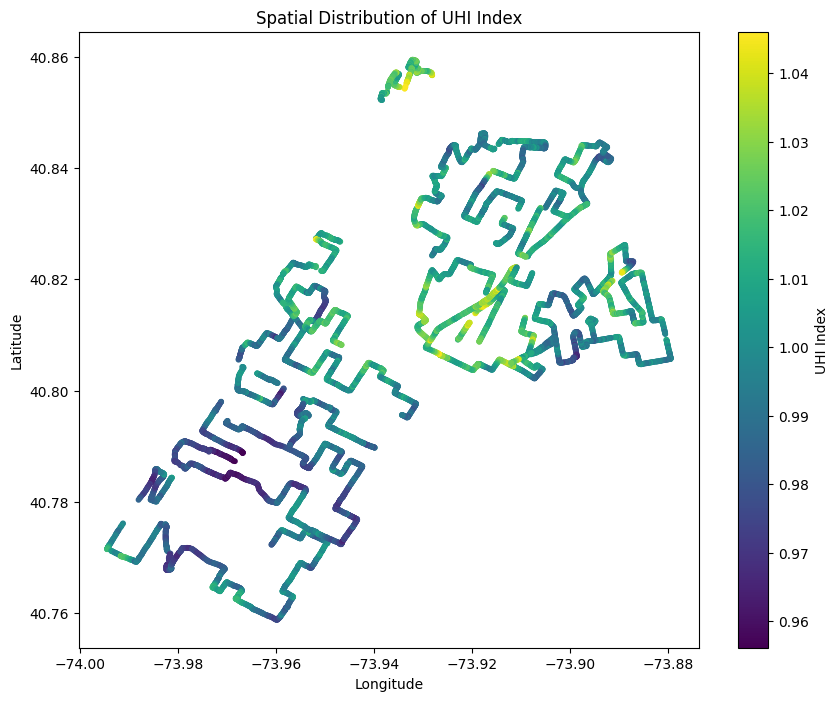

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], c=df['UHI Index'], cmap='viridis', s=10)
plt.colorbar(label='UHI Index')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of UHI Index')
plt.show()

## Summary:

### 1. Q&A

* **What is the distribution of UHI index values?** The UHI index values are roughly normally distributed around a mean of approximately 1.0, with some potential outliers at the lower and upper tails.  A histogram and box plot visualization confirm this, with the box plot clearly showing potential outliers.

* **Are there any outliers or anomalies in the UHI index data?** Yes, the box plot of the UHI index suggests the presence of outliers, which are values that fall significantly outside the typical range of the data.  The exact values of these outliers can be identified by examining the data points outside the whiskers of the box plot.

* **What is the geographic coverage of the data points?** The data points cover a specific region, likely in Manhattan and the Bronx, New York City, as indicated in the provided context. The scatter plot visualizes the spatial distribution of these data points, revealing the geographic concentration of the data collection effort.

### 2. Data Analysis Key Findings

* **Data Size:** The dataset consists of 11,229 data points, each with longitude, latitude, datetime, and UHI index values.
* **UHI Index Distribution:** The UHI index has a mean of approximately 1.00 and a standard deviation of 0.0162. The distribution is roughly normal, but box plots reveal the existence of outliers.
* **Spatial Distribution:** The scatter plot visualization shows the spatial distribution of UHI index values across the geographic area covered by the data collection.  The color gradient on the points visually represents the UHI index value at each location.

### 3. Insights or Next Steps

* **Investigate Outliers:** Further analyze the identified outliers in the UHI index. Determine if these are true anomalies or measurement errors.  Understanding the cause of these outliers is crucial for accurate interpretation of the data.
* **Correlation Analysis:** Explore potential correlations between the UHI index and other factors (e.g., time of day, proximity to green spaces, building density) to gain more insights into the spatial patterns of urban heat islands.  This might require supplementing the current dataset with additional information.
